In [158]:
%matplotlib inline

In [159]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
#rcParams['figure.figsize'] = 20, 10

In [160]:
lena = Image.open('lena.png').convert('L')

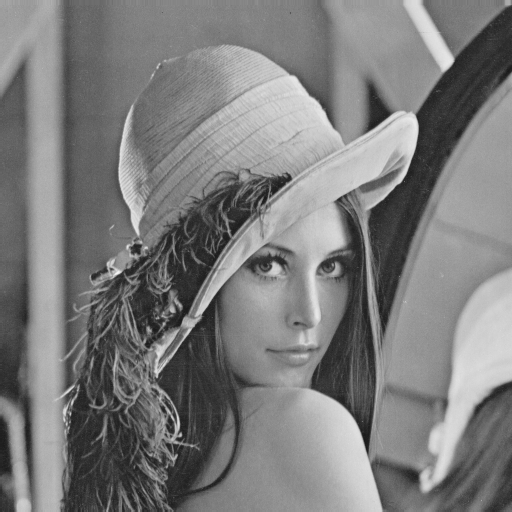

In [161]:
lena

In [173]:
img = np.array(lena)
img

array([[162, 162, 162, ..., 170, 155, 128],
       [162, 162, 162, ..., 170, 155, 128],
       [162, 162, 162, ..., 170, 155, 128],
       ...,
       [ 43,  43,  50, ..., 104, 100,  98],
       [ 44,  44,  55, ..., 104, 105, 108],
       [ 44,  44,  55, ..., 104, 105, 108]], dtype=uint8)

In [174]:
def quantize(img):
    """
        Quantize the given image using only the top left pixel after the image has been split to 8x8s.
    """
    # original image dimensions
    img_rows, img_cols = len(img), len(img[1])
    
    # result image  dimensions
    res_size_x, res_size_y = int(img_rows / 8), int(img_cols / 8)
    #img_type = img.dtype
    
    res = []
    # From left to right get the top-left pixel for every 8x8 array in the image (will definitely break for other images!!!)
    for i in range(0, img_cols, 8):
        for j in range(0, img_rows, 8):
            res.append(img[i, j])
    
    # converting the result array into a numpy array
    res = np.array(res)
    
    # resizing the numpy array to fit the result dimensions
    final_res = np.resize(res, (res_size_x, res_size_y))
    
    # returning resized array
    return final_res
    

In [175]:
result = quantize(img)

In [177]:
img

array([[162, 162, 162, ..., 170, 155, 128],
       [162, 162, 162, ..., 170, 155, 128],
       [162, 162, 162, ..., 170, 155, 128],
       ...,
       [ 43,  43,  50, ..., 104, 100,  98],
       [ 44,  44,  55, ..., 104, 105, 108],
       [ 44,  44,  55, ..., 104, 105, 108]], dtype=uint8)

Text(0.5, 1.0, 'Quantized image (top left 8x8 pixel)')

<Figure size 2000x1000 with 0 Axes>

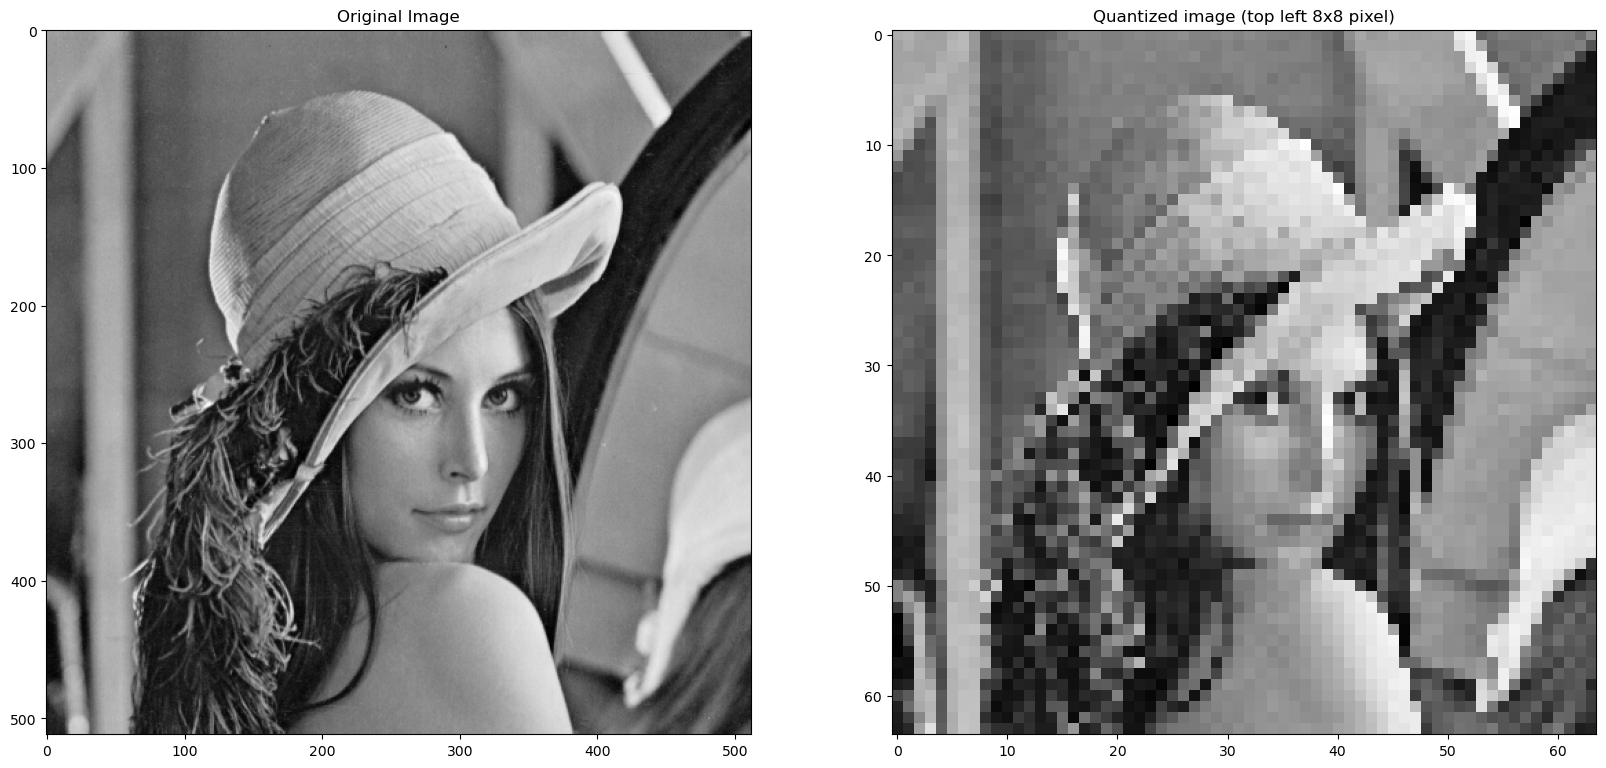

In [181]:
plt.gray()
f, axarr = plt.subplots(1, 2)
axarr[0].imshow(img)
axarr[0].set_title('Original Image')

axarr[1].imshow(result)
axarr[1].set_title('Quantized image (top left 8x8 pixel)')